## Exercise: Product Item Recommender 🧥

In this exercise, we will build a product item recommender that, given a user image, recommends similar products (related images).

First, familiarize yourself with the data:

1. Our image database is small, it only has 10 images. You can have a look at them in the `exercise_3_images/database` folder.
2. The `exercise_3_images/queries` file contains the test images (only 3). That is, for each of this images, we want to find the **most similar** image in our previous datase, that is our recommendation..

**a)** Discuss, in your own words, how would you approach this problem. 

That is, what type of learning problem is, and the kind of models you can use to solve it.

**b)** Compute a suitable vector representation of the database images, based on your answer to the previous question.

In [4]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [6]:
import glob

database_image_paths = glob.glob("exercise1_images/database/*")
database_image_paths

['exercise1_images/database/balenciaga-red-c-shape-puffer-jacket-15165132865585.jpg',
 'exercise1_images/database/Y2647189-01.jpg',
 'exercise1_images/database/41hwX-ymObL._SL500_.jpg',
 'exercise1_images/database/fischer-jacket-kaprun-m_3.jpg',
 'exercise1_images/database/Layer_10.jpg',
 'exercise1_images/database/Big-Agnes-Womens-Luna-Jacket.jpg.webp',
 'exercise1_images/database/compass1672503284-1-1.jpg',
 'exercise1_images/database/4000245_004.jpg',
 'exercise1_images/database/Crossover-Bandung-1024x1024.jpg',
 'exercise1_images/database/13523523.jpg']

In [14]:
# compute the image embeddings
image_features = []

for image_path in database_image_paths:
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        image_feature = model.encode_image(image)
        image_feature /= image_feature.norm(dim=-1, keepdim=True)
        image_features.append(image_feature)

image_features = torch.cat(image_features, dim=0)

In [13]:
image_features.shape

torch.Size([10, 512])

**c)** Finally, for each of the three query images, find the most similar image in the database.

For each of the three cases, display both the query image and the most similar image (the recommendation)

In [15]:
query_images = glob.glob("exercise1_images/queries/*")

# compute the query image embeddings
query_features = []

for image_path in query_images:
    image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    with torch.no_grad():
        image_feature = model.encode_image(image)
        image_feature /= image_feature.norm(dim=-1, keepdim=True)
        query_features.append(image_feature)

query_features = torch.cat(query_features, dim=0)

In [16]:
query_features.shape

torch.Size([3, 512])

In [19]:
similarities = query_features @ image_features.T
idxs = similarities.argmax(dim=-1)

In [20]:
idxs

tensor([8, 4, 3])

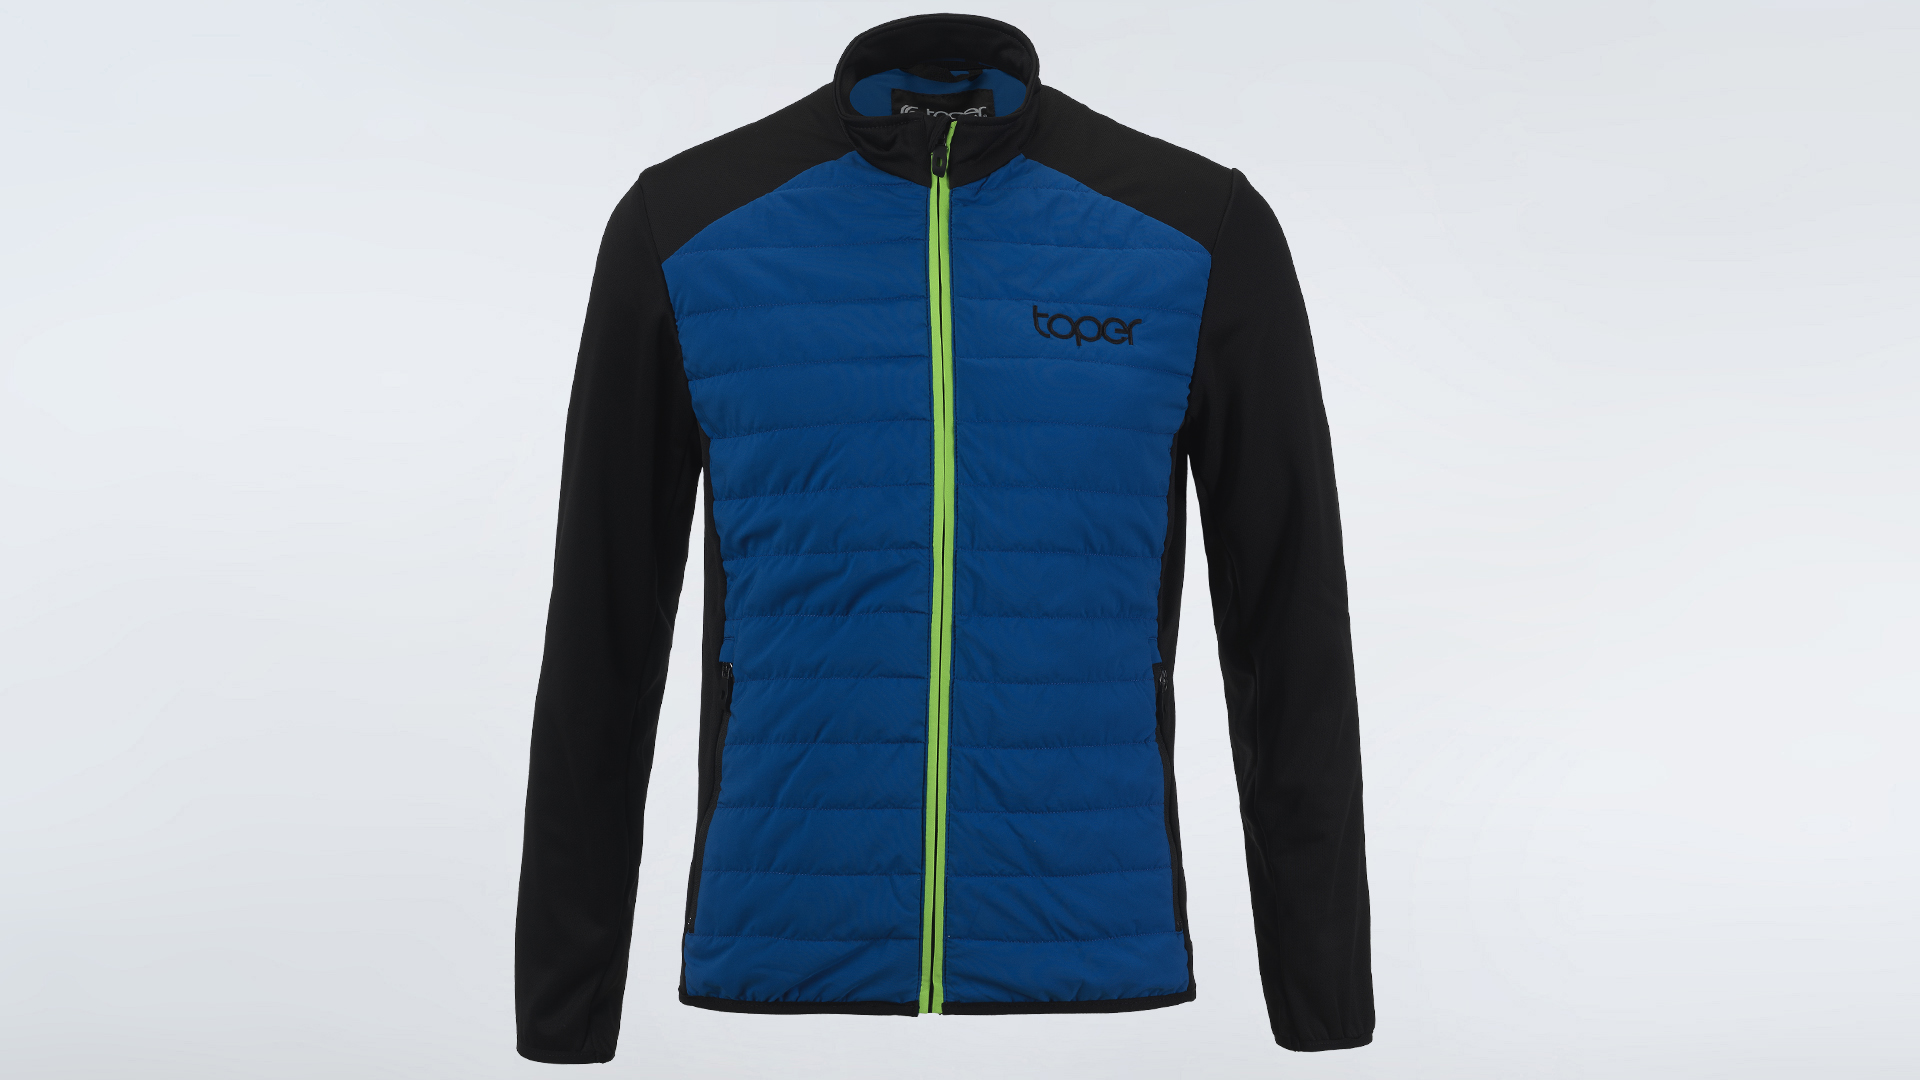

In [30]:
i = 2
Image.open(query_images[i])

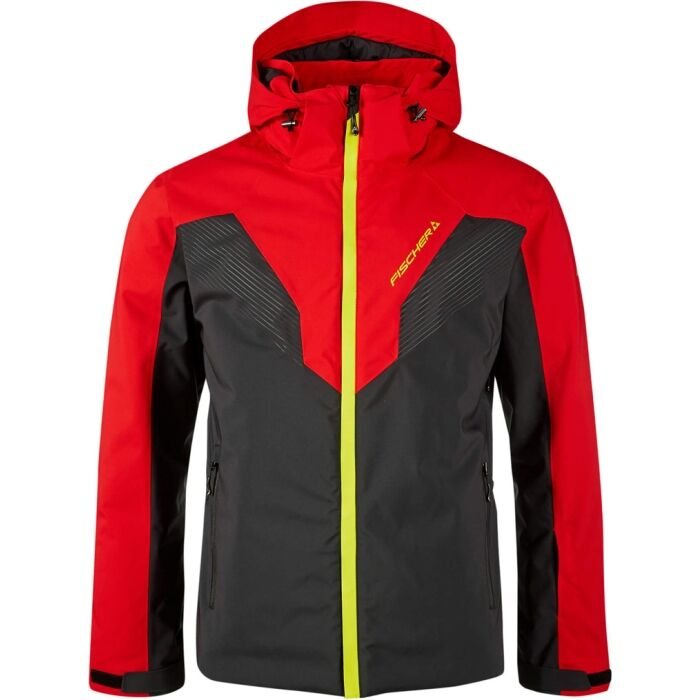

In [31]:
Image.open(database_image_paths[idxs[i]])

**d)** Based on the previous results, discuss the performance of your model for this task (is it good or has some limitations?) 

Discuss also some potential use cases of this exercise.